# Compare Cyclones

This will be a preliminary comparison between the different model types

In [1]:
# Data
import numpy as np
import netCDF4 as nf
import pandas as pd
import xarray as xr
import datetime
# Plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
# Image rendering
import imageio
from IPython.display import Image

## Mostly just ignore this, though it could be nice to see my previous work here

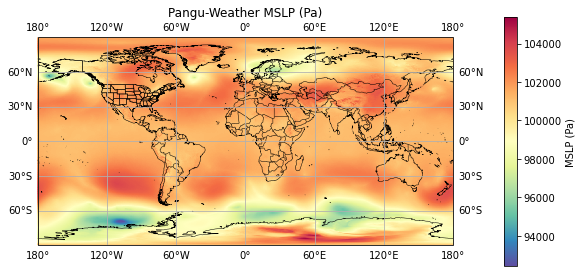

[99772.4 99732.  99696.4 ... 99892.2 99853.6 99812.8]


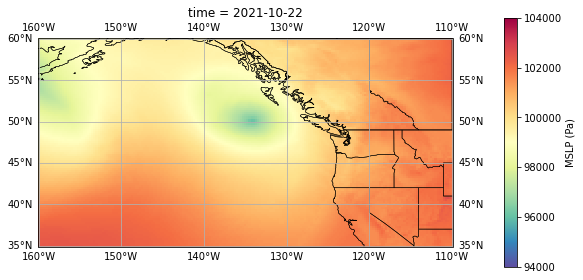

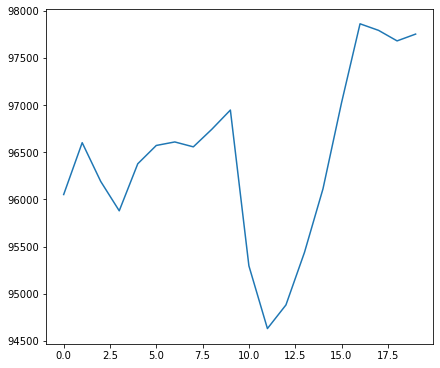

Bomb cyclone at: 10
Bomb cyclone at: 10
Bomb cyclone at: 11
Bomb cyclone at: 11
Bomb cyclone at: 11
Bomb cyclone at: 12
{'t_curr': 10, 't_begin': 9, 'msl_curr': 95296.195, 'msl_begin': 95296.195, 'rate': 2.752565104166667} 

{'t_curr': 10, 't_begin': 8, 'msl_curr': 95296.195, 'msl_begin': 95296.195, 'rate': 1.2067252604166667} 

{'t_curr': 11, 't_begin': 10, 'msl_curr': 94631.086, 'msl_begin': 94631.086, 'rate': 1.108515625} 

{'t_curr': 11, 't_begin': 9, 'msl_curr': 94631.086, 'msl_begin': 94631.086, 'rate': 1.9305403645833334} 

{'t_curr': 11, 't_begin': 8, 'msl_curr': 94631.086, 'msl_begin': 94631.086, 'rate': 1.1739887152777777} 

{'t_curr': 12, 't_begin': 9, 'msl_curr': 94881.41, 'msl_begin': 94881.41, 'rate': 1.1479600694444445} 

[225.75, 200.0, 200.0, 201.0, 204.75, 207.25, 209.25, 211.25, 212.75, 225.75, 228.0, 229.0, 230.0, 230.75, 230.75, 232.5, 213.5, 214.0, 218.75, 222.5]
[50.0, 56.25, 56.5, 55.25, 55.0, 54.75, 54.75, 54.75, 54.75, 43.75, 45.75, 46.0, 47.0, 47.75, 48.0, 48

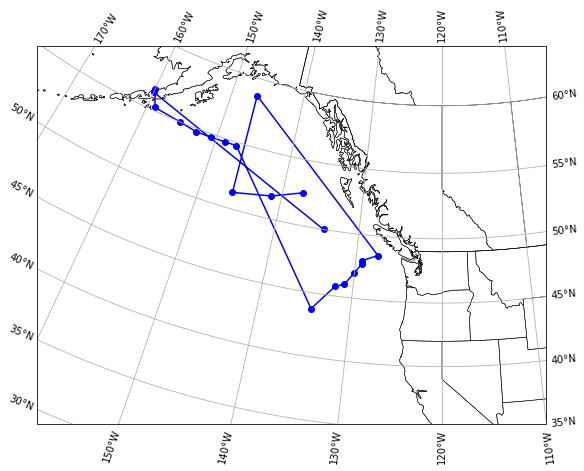

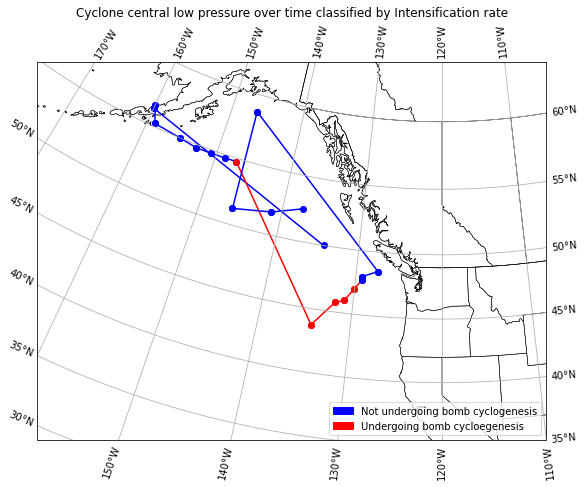

jello


In [2]:
%run ai_cyclone_track.ipynb 
#from ipynb.fs.full.ai_cyclone_track import *

## File IO

This is where we will import the data from file.
*Note:* Since all the data from ai_cyclone_track.ipynb is carried over, I do not need to re-import the pangu-weather model data

### Constants

Just some quick constants stuff that we either brought from the previous notebook but wanted to restate or others that we thought we needed to make before we move forward with anything else we might get into

In [11]:
## Here we need to convert the various strings into datetime objects
end_date = '1027'

start_date = pd.to_datetime("%s-%s-%s 00:00:00"%(year,day[0:2],day[2:]))
end_date = pd.to_datetime("%s-%s-%s 00:00:00"%(year,end_date[0:2],end_date[2:]))
print(start_date,end_date)

# Just some other constants I thought would be important to bring along
domain=[200,250,35,60]
# In hPa
vmin = 940
vmax = 1040

2021-10-22 00:00:00 2021-10-27 00:00:00


In [4]:
pangu_weather['msl'] /= 100
pangu_weather

<xarray.Dataset>
Dimensions:    (time: 41, longitude: 1440, latitude: 721, level: 13)
Coordinates:
  * time       (time) datetime64[ns] 2021-10-22 ... 2021-11-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1000 925 850 700 600 500 400 300 250 200 150 100 50
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2         (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 1.017e+03 ... 1.016e+03
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:           CF-1.8
    version:               1_2023-10-14
    model_name:            Pangu-Weather
    model_version:         v1
    initialization_model:  GFS
    initialization_time:   2021-10-22T00:00:00
    first_forecast_hour:   6
    last_forecast_hour:    240
    forecast_hour_step:    6
    creation_time:         2023-11-19T07:54:32

In [5]:
fourcast = xr.open_dataset('%sFOUR_v200_GFS_%s%s%s_f000_f240_06.nc'%('data/FOUR_v200/',year, day, init))
fourcast['msl'] /= 100
fourcast

<xarray.Dataset>
Dimensions:    (time: 41, longitude: 1440, latitude: 721, level: 13)
Coordinates:
  * time       (time) datetime64[ns] 2021-10-22 ... 2021-11-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1000 925 850 700 600 500 400 300 250 200 150 100 50
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    t2         (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    ...         ...
    tcwv       (time, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:           CF-1.8
    version:               1_2023-10-14
    model_name:            FourCastNet
    model_version:         v2-small
    initialization_model:  GFS
    initialization_time:   2021-10-22T00:00:00
    first_forecast_hour:   6
    last_forecast_hour:    240
    forecast_hour_step:    6
    creation_time:         2023-11-19T08:03:41

In [6]:
era = xr.open_dataset('%s/sfc_mslp_6hr_%s.nc'%('data/ERA5',year))
era = era.sel(time=slice(start_date,end_date))
era['msl'] /= 100

time_arr = era['time'].to_numpy()
print(len(time_arr))
print(type(time_arr))

era

21
<class 'numpy.ndarray'>


<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 21)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-10-22 ... 2021-10-27
Data variables:
    msl        (time, latitude, longitude) float32 1.018e+03 1.018e+03 ... 996.6
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-17 17:35:31 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Plot making

Now that we have figured that all out, let's make some plots and see if we don't find anything fun

I think for at least the first part we will be making the various plots we made previously, but this time with all the data

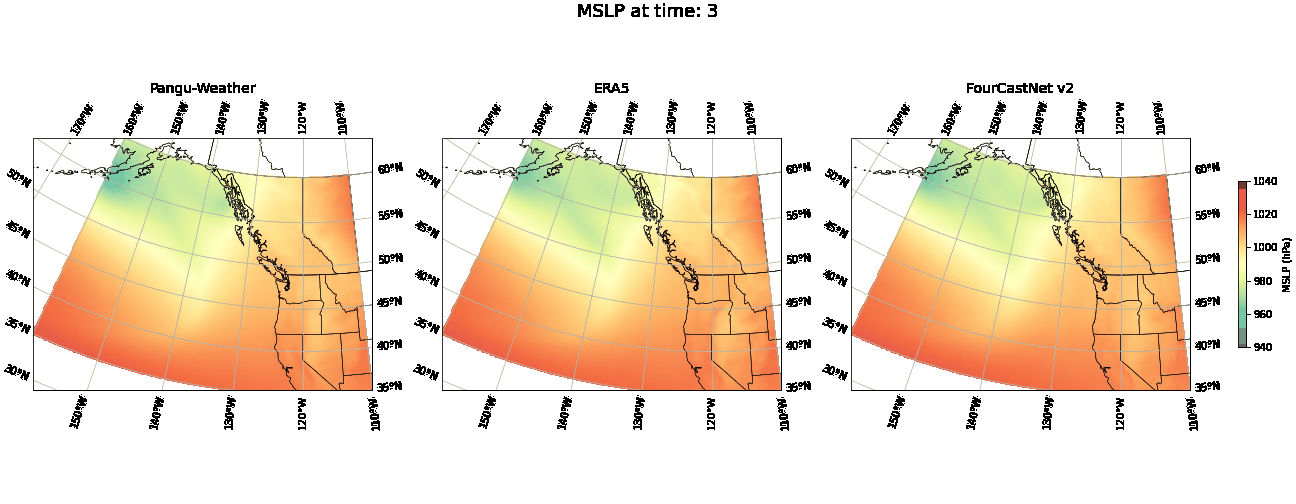

In [12]:
models = [pangu_weather, era, fourcast]
model_names = ['Pangu-Weather', 'ERA5', 'FourCastNet v2']
cyclone_tracks = [[],[],[]]
colors = ['blue','black','red']

frames = []
for time in range(3,18):
    time_arr_cut = time_arr[3:18]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,7), constrained_layout=True,
                            subplot_kw={'projection': crs_pnw})
    for m,model in enumerate(models):
        msl_subset = model['msl'].isel(time=time).sel(longitude=slice(domain[0], domain[1]), latitude=slice(domain[3], domain[2]))

        minp = np.nanmin(msl_subset)
        min_indices = np.unravel_index(np.nanargmin(msl_subset), msl_subset.shape)

        lon_values = msl_subset['longitude'].values[min_indices[1]]
        lat_values = msl_subset['latitude'].values[min_indices[0]]
        cyclone_dict = {'lon': lon_values, 'lat': lat_values, 'msl': minp}
        cyclone_tracks[m].append(cyclone_dict)

        plot_subset_background(ax[m],domain[0],domain[1],domain[2],domain[3])

        cf1 = model['msl'].isel(time=time).sel(longitude=slice(domain[0],domain[1]),latitude=slice(domain[3],domain[2])).plot(ax=ax[m], x='longitude', y='latitude',
                    cmap='Spectral_r', transform=ccrs.PlateCarree(), zorder = 0, add_colorbar = False, vmin=vmin, vmax=vmax)

        ax[m].set_title(model_names[m], fontsize = 14)

        #print("Model: %s\tTime: %s"%(model_names[m],np.datetime_as_string(model['time'].isel(time=time), unit='s'))) # For debugging

    fig.colorbar(cf1, ax = ax[len(ax)-1], shrink = 0.35).set_label(label = 'MSLP (hPa)')

    #time = pd.to_datetime()
    time_str = np.datetime_as_string(models[m]['time'].isel(time=time), unit='s')
    #time = ts.strftime('%Y-%m-%d %HH:%MM:%SS')

    fig.suptitle("MSLP at time: %s"%time, fontsize = 18)
    fig.savefig('gifs/frames/%s_%s_%s_multimodel_time_%s.png'%(year, day, init, time))
    picture = imageio.imread('gifs/frames/%s_%s_%s_multimodel_time_%s.png'%(year, day, init, time))
    frames.append(picture)
    plt.close()


imageio.mimsave('gifs/%s_%s_%s_multimodel.gif'%(year, day, init), frames, duration = 0.5)
Image('gifs/%s_%s_%s_multimodel.gif'%(year, day, init))

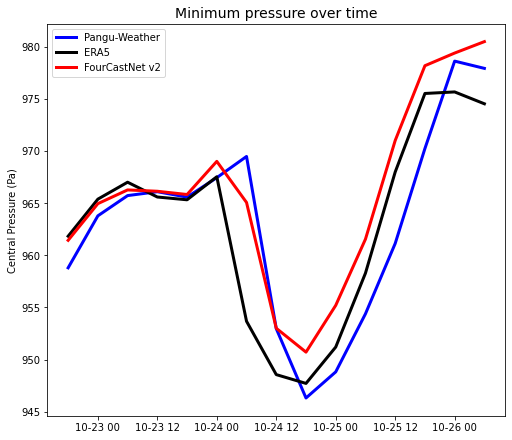

In [8]:
fig, ax = plt.subplots(1,1,figsize = (7,6), constrained_layout=True, facecolor = 'w')

pangu_mins = [times_p['msl'] for times_p in cyclone_tracks[0]]
era_mins = [times_e['msl'] for times_e in cyclone_tracks[1]]
fourcast_mins = [times_f['msl'] for times_f in cyclone_tracks[2]]

ax.plot(time_arr_cut, pangu_mins, label = 'Pangu-Weather', color = 'blue', linewidth=3)
ax.plot(time_arr_cut, era_mins, label = 'ERA5', color = 'black', linewidth=3)
ax.plot(time_arr_cut, fourcast_mins, label = 'FourCastNet v2', color = 'red', linewidth=3)

ax.set_title("Minimum pressure over time", fontsize = 14)
ax.set_ylabel("Central Pressure (Pa)")
ax.legend()

Text(0.5, 1.0, 'Cyclone tracks over time')

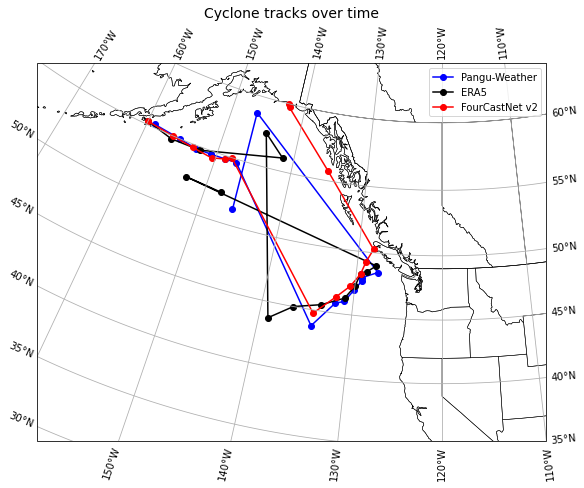

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7), constrained_layout=True, subplot_kw={'projection': crs_pnw}, facecolor='w')
plot_subset_background(ax,domain[0],domain[1],domain[2],domain[3])

for m, mod in enumerate(cyclone_tracks):
    lons = [mo['lon'] for mo in mod]
    lats = [mo['lat'] for mo in mod]

    ax.plot(lons, lats, color=colors[m], marker='o',transform=ccrs.PlateCarree(), label = model_names[m])

ax.legend()
ax.set_title("Cyclone tracks over time", fontsize=14)

## Doing some Data comparisons now

In [10]:
# We will need to adjust this rate to adjust for latitude
def bomb_cyclone_check(cyclone_list):
    bomb_cyclone_in = []
    for t, c_dict in enumerate(cyclone_list):
        count = 1
        while(t-count >= 0 and count <= 4):
            #print("t = %s\t t-%s = %s"%(str(t),str(count), str(t-count)))

            # Represents the percentage of the bomb-cyclone intensification rate when using 1mbhr^-1
            int_r8 = ((cyclone_list[t-count]['msl'] - c_dict['msl'])/(6*count))
            #print(int_r8)
            if int_r8 > 1: 
                print("Bomb cyclone at: " +str(t))
                bomb_dict = {'t_curr' : t,
                             't_begin' : t-count,
                             'msl_curr' : c_dict['msl'],
                             'msl_begin' : cyclone_list[t-count]['msl'],
                             'rate' : int_r8}
                bomb_cyclone_in.append(bomb_dict)
            count += 1

    return bomb_cyclone_in

bomb_list = [[],[],[]]
for m in range(0,len(bomb_list)):
    print(f"**Model: %s**"%(model_names[m]))
    bomb_list[m] = bomb_cyclone_check(cyclone_tracks[m])
    for i,b in enumerate(bomb_list[m]):
        print(b , '\n')

**Model: Pangu-Weather**
Bomb cyclone at: 7
Bomb cyclone at: 7
Bomb cyclone at: 8
Bomb cyclone at: 8
Bomb cyclone at: 8
Bomb cyclone at: 9
{'t_curr': 7, 't_begin': 6, 'msl_curr': 952.962, 'msl_begin': 969.47736, 'rate': 2.7525634765625} 

{'t_curr': 7, 't_begin': 5, 'msl_curr': 952.962, 'msl_begin': 967.4426, 'rate': 1.2067209879557292} 

{'t_curr': 8, 't_begin': 7, 'msl_curr': 946.31085, 'msl_begin': 952.962, 'rate': 1.1085205078125} 

{'t_curr': 8, 't_begin': 6, 'msl_curr': 946.31085, 'msl_begin': 969.47736, 'rate': 1.9305419921875} 

{'t_curr': 8, 't_begin': 5, 'msl_curr': 946.31085, 'msl_begin': 967.4426, 'rate': 1.1739874945746527} 

{'t_curr': 9, 't_begin': 6, 'msl_curr': 948.8141, 'msl_begin': 969.47736, 'rate': 1.1479593912760417} 

**Model: ERA5**
Bomb cyclone at: 6
Bomb cyclone at: 7
Bomb cyclone at: 8
{'t_curr': 6, 't_begin': 5, 'msl_curr': 953.6697, 'msl_begin': 967.5296, 'rate': 2.3099873860677085} 

{'t_curr': 7, 't_begin': 5, 'msl_curr': 948.55273, 'msl_begin': 967.5296,